# Libraries

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 1 to 1492
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   INPUT0    1492 non-null   float64
 1   INPUT1    1492 non-null   float64
 2   INPUT2    1492 non-null   float64
 3   INPUT3    1492 non-null   float64
 4   INPUT4    1492 non-null   float64
 5   INPUT5    1492 non-null   float64
 6   INPUT6    1492 non-null   float64
 7   INPUT7    1492 non-null   float64
 8   INPUT8    1492 non-null   float64
 9   TARGET_X  1492 non-null   float64
 10  TARGET_Y  1492 non-null   float64
dtypes: float64(11)
memory usage: 139.9 KB


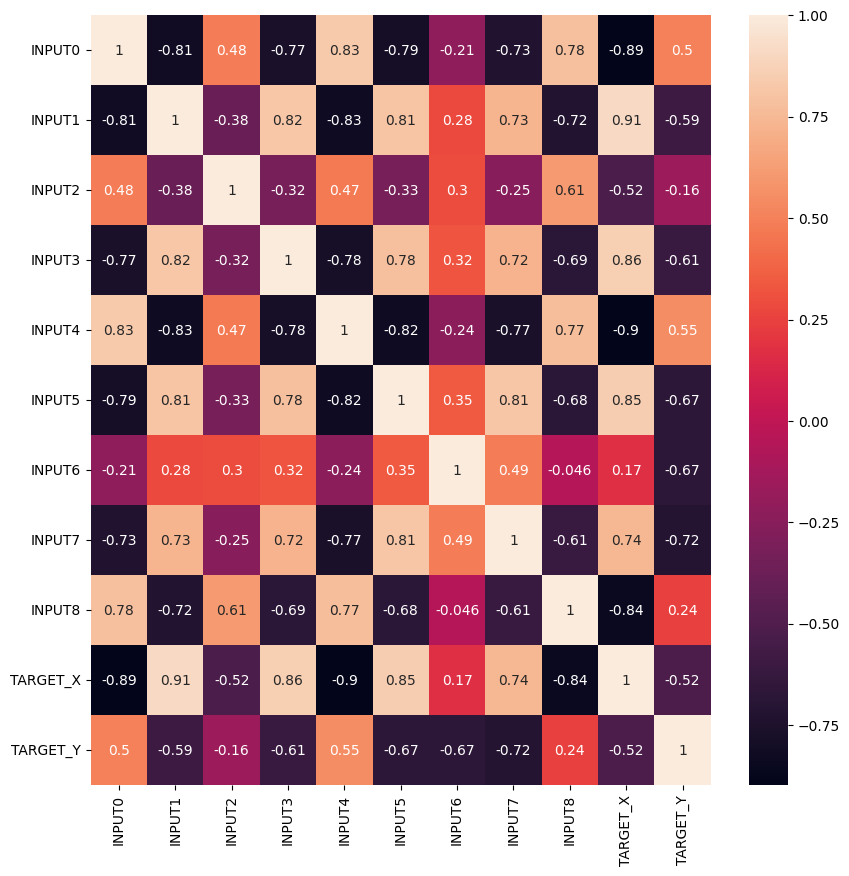

x_train  (1044, 9)
y_train  (1044, 2)
x_test  (448, 9)
y_test  (448, 2)


In [2]:
from set_extraction import x_train, y_train, x_test, y_test

# Models

In [3]:
from sklearn.metrics import make_scorer

from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.neighbors import KNeighborsRegressor

In [4]:
def MEE(actual, predict):

    return np.mean(np.linalg.norm(actual - predict, axis=1))
    

Text(0, 0.5, 'MEE Score')

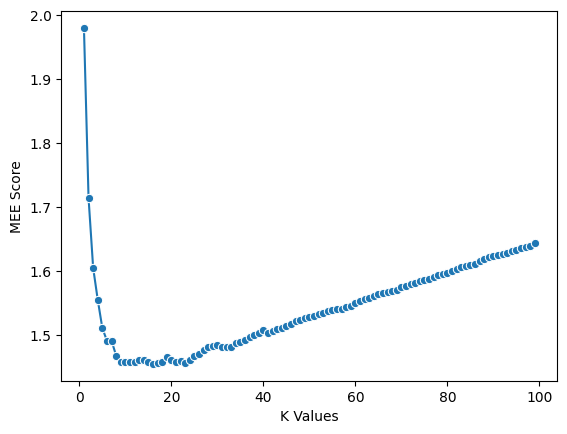

In [5]:
k_values = [i for i in range (1,100)]
scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train, cv=5, scoring=make_scorer(MEE, greater_is_better=False))
    scores.append(-np.mean(score))
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("MEE Score")

In [6]:
results = []

# Neighbors

## KNeighborsRegressor

### Grid search for parameter setting 


In [7]:
#params

In [8]:
params = { 
     'n_neighbors':np.arange(2,30),
     'algorithm':['auto','ball_tree', 'kd_tree', 'brute'], 
}

In [9]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1

knr_search = KNeighborsRegressor() 

knr_cv = GridSearchCV(estimator=knr_search, param_grid=params, scoring=make_scorer(MEE, greater_is_better = False), 
                      cv=5, verbose=4, n_jobs=n_jobs_search) 
knr_cv.fit(x_train, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring=make_scorer(MEE, greater_is_better=False), verbose=4)

In [10]:
knr_cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 16}

In [11]:
# validation
knr_cv.best_score_

-1.455536027704248

In [12]:
# save the model to disk
joblib.dump(knr_cv.best_estimator_, 'cup_models/knr2.z')

['cup_models/knr2.z']

### Final model

In [13]:
knr = joblib.load('cup_models/knr2.z')

In [14]:
knr

KNeighborsRegressor(n_neighbors=16)

In [15]:
train_pred_knr = knr.predict(x_train)

In [16]:
print('MEE train set ', MEE(y_train, train_pred_knr))

MEE train set  1.3488118692663107


In [17]:
test_pred_knr = knr.predict(x_test)

In [18]:
print('MEE test set ', MEE(y_test, test_pred_knr))

MEE test set  1.480238946892829


[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

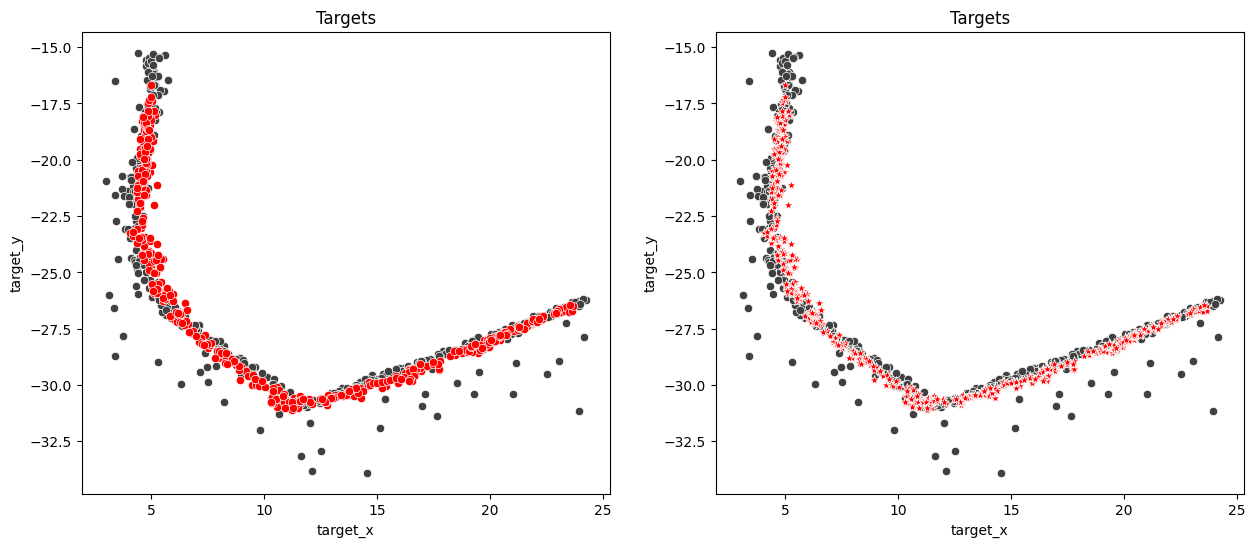

In [19]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[0])
sns.scatterplot(x=test_pred_knr[:,0],y=test_pred_knr[:,1],color='r',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.25',ax=ax[1])
sns.scatterplot(x=test_pred_knr[:,0],y=test_pred_knr[:,1],color='r',ax=ax[1], marker='*', s=50)
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

[Text(0.5, 0, 'target_x'), Text(0, 0.5, 'target_y'), Text(0.5, 1.0, 'Targets')]

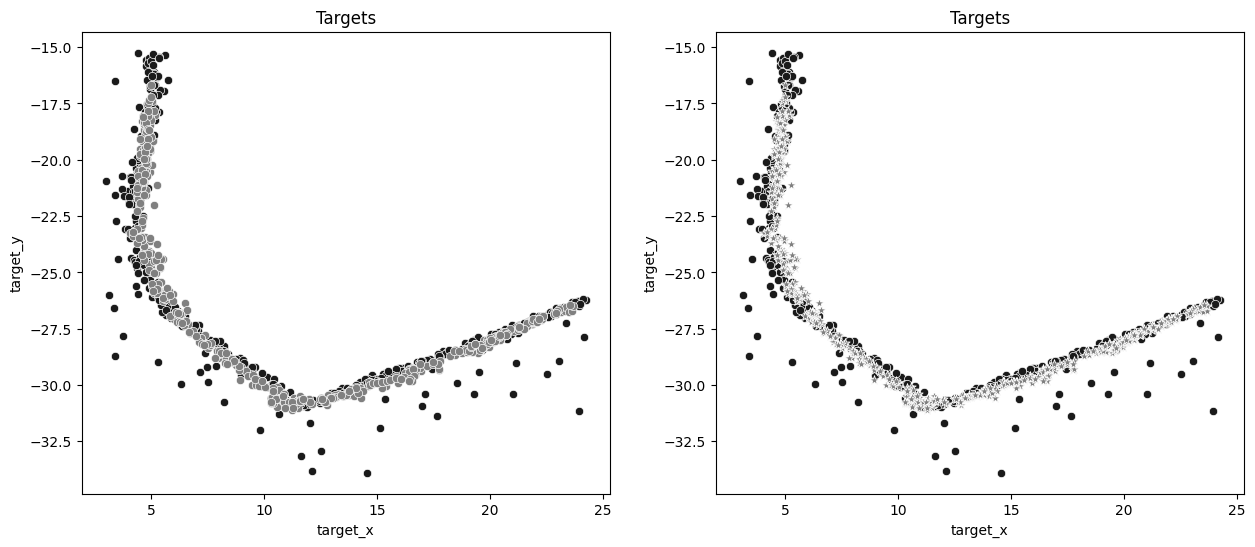

In [20]:
fig, ax = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[0])
sns.scatterplot(x=test_pred_knr[:,0],y=test_pred_knr[:,1],color='.5',ax=ax[0])
ax[0].set(xlabel='target_x',ylabel='target_y',title='Targets')

sns.scatterplot(x=y_test[:,0],y=y_test[:,1],color='.1',ax=ax[1])
sns.scatterplot(x=test_pred_knr[:,0],y=test_pred_knr[:,1],color='.5',ax=ax[1], marker='*', s=50)
ax[1].set(xlabel='target_x',ylabel='target_y',title='Targets')

In [21]:
results.append(('KNeighborsRegressor train', MEE(y_train, train_pred_knr)))
results.append(('KNeighborsRegressor validation', knr_cv.best_score_))

# Summary

In [22]:
for i in range(len(results)):
  print(results[i])

('KNeighborsRegressor train', 1.3488118692663107)
('KNeighborsRegressor validation', -1.455536027704248)
